# CSI 4142 Fundamentals of Data Science, Winter 2025
# Assignment 1 - Exploratory Data Analysis

## Group A - 72
### Hilaire Junior Kalala - 300289737
### Johann Rajosefa - 300300054
 

## Dataset 1 : Customer Segmentation Data
### A. Introduction
In today's data-driven world, understanding the socio-economic factors that influence income levels is crucial for policymakers, organizations, and businesses alike. By analyzing demographic and occupational characteristics, insights can be drawn to predict income disparities and identify trends in workforce participation. 
This study leverages Exploratory Data Analysis (EDA), a key process in Data Science, to explore the Adult Census Income dataset. The aim is to segment individuals based on factors such as education, occupation, and age, to help businesses optimize recruitment strategies, tailor offerings, and better address economic inequalities.



### B. Description of the dataset


This data was extracted from the census bureau database found at
 http://www.census.gov/ftp/pub/DES/www/welcome.html
 Donor: Ronny Kohavi and Barry Becker,
        Data Mining and Visualization
        Silicon Graphics.
        e-mail: ronnyk@sgi.com for questions.
 Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
 45222 if instances with unknown values are removed (train=30162, test=15060)
 Duplicate or conflicting instances : 6
 Class probabilities for adult.all file
 Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
 Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

 Extraction was done by Barry Becker from the 1994 Census database.  A set of
  reasonably clean records was extracted using the following conditions:
   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

 Prediction task is to determine whether a person makes over 50K
 a year.

 First cited in:
 @inproceedings{kohavi-nbtree,
    author={Ron Kohavi},
    title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a
           Decision-Tree Hybrid},
    booktitle={Proceedings of the Second International Conference on
               Knowledge Discovery and Data Mining},
    year = 1996,
    pages={to appear}}

 Error Accuracy reported as follows, after removal of unknowns from
    train/test sets):
    C4.5       : 84.46+-0.30
    Naive-Bayes: 83.88+-0.30
    NBTree     : 85.90+-0.28


 Following algorithms were later run with the following error rates,
    all after removal of unknowns and using the original train/test split.
    All these numbers are straight runs using MLC++ with default values.

    Algorithm               Error
 -- ----------------        -----
 1  C4.5                    15.54
 2  C4.5-auto               14.46
 3  C4.5 rules              14.94
 4  Voted ID3 (0.6)         15.64
 5  Voted ID3 (0.8)         16.47
 6  T2                      16.84
 7  1R                      19.54
 8  NBTree                  14.10
 9  CN2                     16.00
 10 HOODG                   14.82
 11 FSS Naive Bayes         14.05
 12 IDTM (Decision table)   14.46
 13 Naive-Bayes             16.12
 14 Nearest-neighbor (1)    21.42
15 Nearest-neighbor (3)    20.35
 16 OC1                     15.04
17 Pebls                   Crashed.  Unknown why (bounds WERE increased)

 Conversion of original data as follows:
 1. Discretized agrossincome into two ranges with threshold 50,000.
 2. Convert U.S. to US to avoid periods.
 3. Convert Unknown to "?"
 4. Run MLC++ GenCVFiles to generate data,test.

 Description of fnlwgt (final weight)

 The weights on the CPS files are controlled to independent estimates of the
 civilian noninstitutional population of the US.  These are prepared monthly
 for us by Population Division here at the Census Bureau.  We use 3 sets of
 controls.
  These are:
          1.  A single cell estimate of the population 16+ for each state.
          2.  Controls for Hispanic Origin by age and sex.
          3.  Controls by Race, age and sex.

 We use all three sets of controls in our weighting program and "rake" through
 them 6 times so that by the end we come back to all the controls we used.

 The term estimate refers to population totals derived from CPS by creating
 "weighted tallies" of any specified socio-economic characteristics of the
 population.
 People with similar demographic characteristics should have
 similar weights.  There is one important caveat to remember
 about this statement.  That is that since the CPS sample is
 actually a collection of 51 state samples, each with its own
 probability of selection, the statement only applies within
 state.

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [33]:
# We worked with a sample of 1000 randomly selcted rows from the original dataset
# I'm gonna start by importing all the packages needed and load the dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

#Initialisation of the dataset
ad_dt = pd.read_csv("https://raw.githubusercontent.com/KugleBlitz007/CSI4142/refs/heads/main/adult.data", header=None, skipinitialspace=True)
# Assign column names based on adult.names file
ad_dt.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
              "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
              "hours_per_week", "native_country", "income"]



ad_dt = pd.read_csv("https://raw.githubusercontent.com/KugleBlitz007/CSI4142/refs/heads/main/adult.csv")
ad_dt.info()
ad_dt.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   workclass       1000 non-null   object
 2   fnlwgt          1000 non-null   int64 
 3   education       1000 non-null   object
 4   education_num   1000 non-null   int64 
 5   marital_status  1000 non-null   object
 6   occupation      1000 non-null   object
 7   relationship    1000 non-null   object
 8   race            1000 non-null   object
 9   sex             1000 non-null   object
 10  capital_gain    1000 non-null   int64 
 11  capital_loss    1000 non-null   int64 
 12  hours_per_week  1000 non-null   int64 
 13  native_country  1000 non-null   object
 14  income          1000 non-null   object
dtypes: int64(6), object(9)
memory usage: 117.3+ KB


(1000, 15)

### C. Set of 10 Insights


#### 1. r1 - Univariate analysis on numerical data
The strong concentration of adults working between 40 and 50 hours per week suggests that standard full-time employment is the norm and the approximately normal distribution further implies that extreme work hours (very low or very high) are less common.


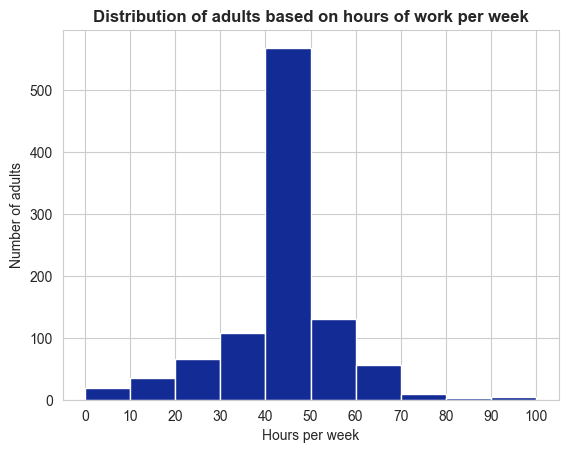

In [21]:
bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(ad_dt.hours_per_week, bins=bins,
        color = "#132b94")
plt.xticks(bins)

plt.ylabel("Number of adults")
plt.xlabel("Hours per week")
plt.title("Distribution of adults based on hours of work per week", fontweight="bold")
plt.show()

#### 2. r2 - Countplot for a category with multiple values
Here, the relatively lower proportion of "Wife" (5.7%) may indicate gender imbalances in the dataset, potentially reflecting societal roles or biases in data collection.

In [22]:
#The fonction I'm gonna use to represent the countplot of categorical variable with multiple values
def make_race_pie_chart():
    labelss=["Wife","Own-child","Husband","Not-in-family","Other-relative","Unmarried"]
    
    wife=ad_dt.loc[ad_dt["relationship"] == "Wife"].shape[0]
    own_c=ad_dt.loc[ad_dt["relationship"] == "Own-child"].shape[0]
    husband=ad_dt.loc[ad_dt["relationship"] == "Husband"].shape[0]
    no_fam=ad_dt.loc[ad_dt["relationship"] == "Not-in-family"].shape[0]
    other=ad_dt.loc[ad_dt["relationship"] == "Other-relative"].shape[0]
    unmar=ad_dt.loc[ad_dt["relationship"] == "Unmarried"].shape[0]

    plt.figure(figsize=(8,8))
    plt.title("Repartion of adults across relationship categories",
              fontsize=16,
              fontweight="bold")
    plt.pie([wife,own_c,husband,no_fam,other,unmar], labels = labelss, 
            autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', # Thanks to ChatGpt lol 'cause wth is even this
            startangle=140, 
            colors=["#ff9999","#66b3ff","#99ff99","#ffcc99","#c2c2f0","#ffb3e6"],
            wedgeprops={'edgecolor': 'black'}
           )
    
    
    plt.show()

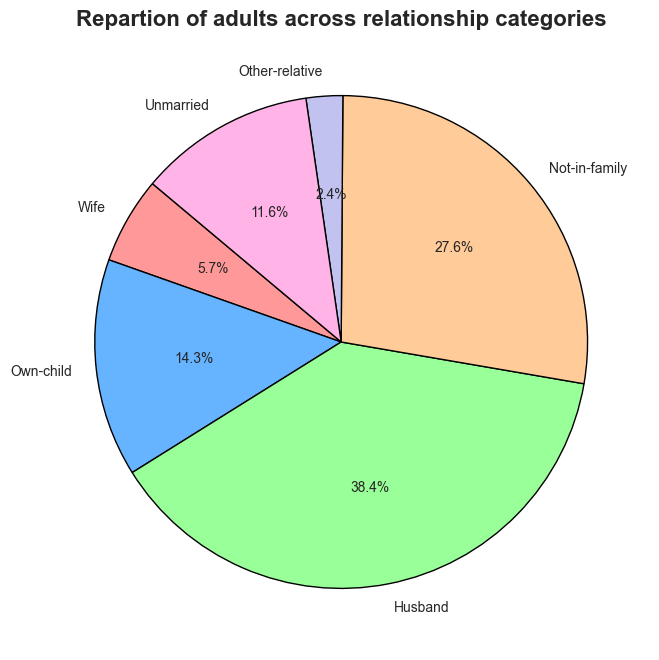

In [23]:
make_race_pie_chart()

#### 3. r2 - Countplot for a category with multiple values
The dataset is predominantly composed of White individuals, making up the vast majority of the population, which suggests that any analysis derived from the dataset may be more reflective of the majority group and may require careful interpretation when considering minority populations.

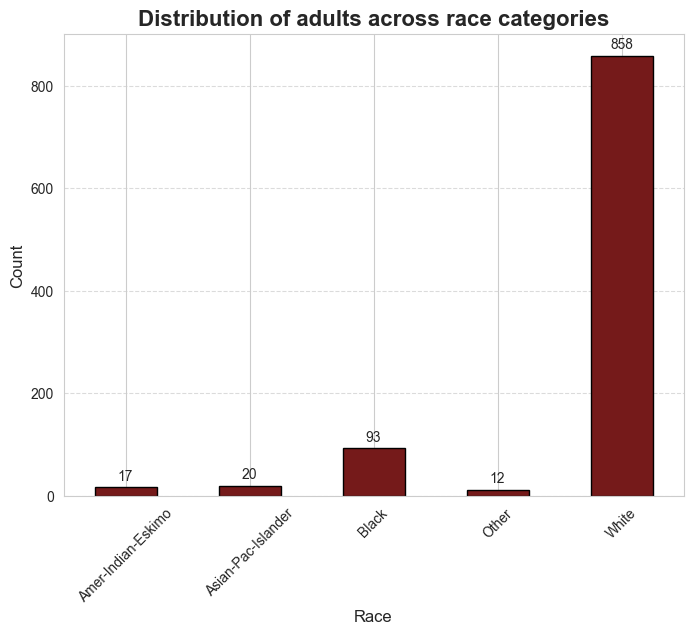

In [24]:
#The fonction used to create a barplot for the categorical value race
def make_race_barplot():
    race_tab = pd.crosstab(index=ad_dt["race"],
                       columns="count")
    r_barplot = race_tab.plot(kind="bar",
                  figsize=(8,6),
                  color="#751a1a",
                  edgecolor="black",
                  legend=False)

    # Adding a title and axis labels
    plt.title("Distribution of adults across race categories", fontsize=16, fontweight="bold")
    plt.xlabel("Race", fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Adding count labels on top of each bar
    for container in r_barplot.containers:
        r_barplot.bar_label(container, fmt="%d", fontsize=10, padding=3)

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)

    # Showing gridlines for readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()

make_race_barplot()

#### 4. r3 - Grouped-Data Countplot in which I grouped some values
This distribution suggests that most individuals have either completed high school or pursued some post-secondary education without necessarily obtaining a degree, potentially influencing income levels and job opportunities.

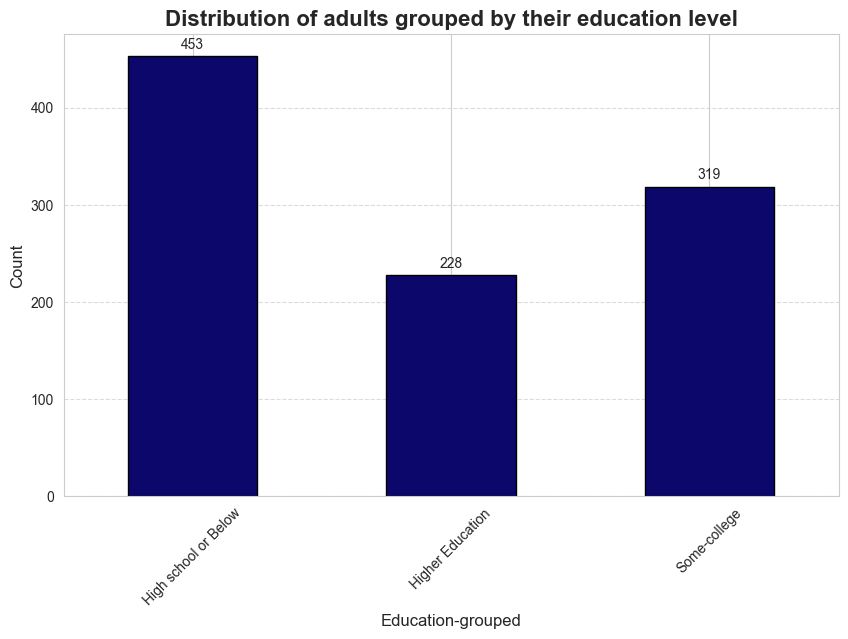

In [25]:
def group_education():
    education_groups = {
        'Bachelors': 'Higher Education',
        'Masters': 'Higher Education',
        'Doctorate': 'Higher Education',
        'HS-grad': 'High school or Below',
        '12th':'High school or Below',
        '11th': 'High school or Below',
        '10th': 'High school or Below',
        '9th': 'High school or Below',
        '7th-8th':'High school or Below',
        '5th-6th':'High school or Below',
        '1st-4th':'High school or Below',
        'Preschool': 'High school or Below',
        'Prof-school':'Some-college',
        'Some-college': 'Some-college',
        'Assoc-acdm': 'Some-college',
        'Assoc-voc': 'Some-college'
    }

    # Apply the grouping
    ad_dt['education_grouped'] = ad_dt['education'].map(education_groups)

#The fonction used to make the barplot of the grouped countplot for education variable
#ChatGpt helped improve this fonction
def make_grouped_countplot():
    sns.set_style("whitegrid")
    ed_tab = pd.crosstab(index=ad_dt["education_grouped"],
                       columns="count")
    ed_barplot = ed_tab.plot(kind="bar",
                  figsize=(10,6),
                  color=["#0c076b", "#ff5733", "#33ff57"],
                  edgecolor="black",
                  legend=False)

    # Adding a title and axis labels
    plt.title("Distribution of adults grouped by their education level", fontsize=16, fontweight="bold")
    plt.xlabel("Education-grouped", fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Adding count labels on top of each bar
    for container in ed_barplot.containers:
        ed_barplot.bar_label(container, fmt="%d", fontsize=10, padding=3)

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)

    # Showing gridlines for readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()

group_education()
make_grouped_countplot()


#### 5. r3 - Grouped-Data countplot with native countries
There is a strong North American dominance that suggests that the dataset primarily reflects individuals from that region, potentially impacting the generalizability of findings to other parts of the world.

C:\Users\HP\AppData\Local\Temp\ipykernel_3772\3839921317.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="continent", y="count", data=cont_tab, palette=colors)


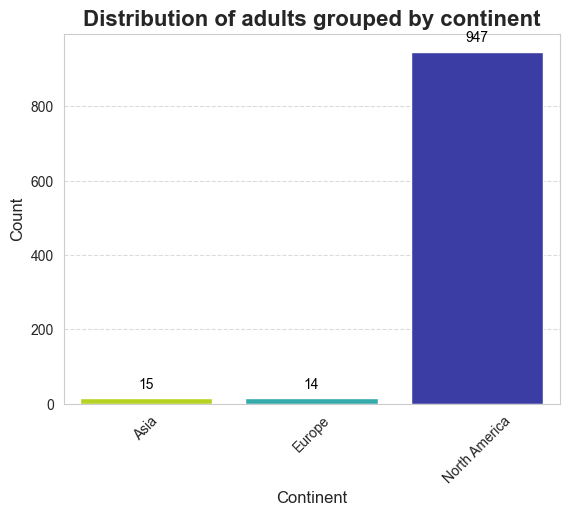

In [26]:
# I'm gonna use 2 fonctions here, the first to group the values of the category native-country into values
# of a category "native-continent" in order to do an analysis based on the continent where the people of the dataset where born
# The second fonction is gonna create a bar plot using the seaborn package to have different colors for the different values od the grouped category

def group_countries():
    #Hong means Hong Kong
    # South could mean South Korea or could refer to a region rather thaan a country (not sure so I don't take it into account)
    continents = {
        'United-States':'North America',
        'Canada':'North America',
        'Mexico':'North America',
        'Puerto-Rico':'North America',
        'Dominican-Republic':'North America',
        'Jamaica':'North America',
        'Haiti':'North America',
        'Cuba':'North America',
        'Honduras':'North America',
        'Guatemala':'North America',
        'Nicaragua':'North America',
        'El-Salvador':'North America',
        'Trinidad & Tobago':'North America',
        'Outlying-US(Guam-USVI-etc)':'North America',
        'Esdcoudaor':'South America',
        'Colombia':'South America',
        'Peru':'South America',
        'England':'Europe',
        'Germany':'Europe',
        'Greece':'Europe',
        'Italy':'Europe',
        'Poland':'Europe',
        'Portugal':'Europe',
        'Ireland':'Europe',
        'France':'Europe',
        'Hungary':'Europe',
        'Scotland':'Europe',
        'Yugoslavia':'Europe',
        'Holand-Netherlands':'Europe',
        'India':'Asia',
        'Japan':'Asia',
        'China':'Asia',
        'Iran':'Asia',
        'Philippines':'Asia',
        'Vietnam':'Asia',
        'Laos':'Asia',
        'Taiwan':'Asia',
        'Thailand':'Asia',
        'Hong':'Asia'
    }

    #Applying groups
    ad_dt["continent"] = ad_dt["native_country"].map(continents)

#The fonction that we'll use to make a seaborn barplot to show the distribution of the dataset based on the new grouped category "continent"
#Chat-Gpt helped me improve my code
def make_continent_barplot():
    
    sns.set_style("whitegrid")  # Makes the background white with gridlines
    
    # Create the crosstab to count occurrences of each category of continent
    cont_tab = pd.crosstab(index=ad_dt["continent"], columns="count").reset_index()
    
    # Seaborn barplot: manually set colors using palette
    colors = {"North America": "#2a2cb5", "South America": "#5fad23", "Europe": "#22bfbf", "Asia": "#c9f007"}

    # Create a seaborn barplot
    sns.barplot(x="continent", y="count", data=cont_tab, palette=colors)
    
    # Adding a title and axis labels
    plt.title("Distribution of adults grouped by continent", fontsize=16, fontweight="bold")
    plt.xlabel("Continent", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    
    # Adding count labels on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           fontsize=10, color='black', 
                           xytext=(0, 10), textcoords='offset points')
    
    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show gridlines for readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Show the plot
    plt.show()


group_countries()
make_continent_barplot()

#### 6. r4 - Comparing categoris with two values 
There is a significant income gap between men and women in the dataset, wich could be influenced by factors such as occupational differences, work experience, or systemic inequalities.

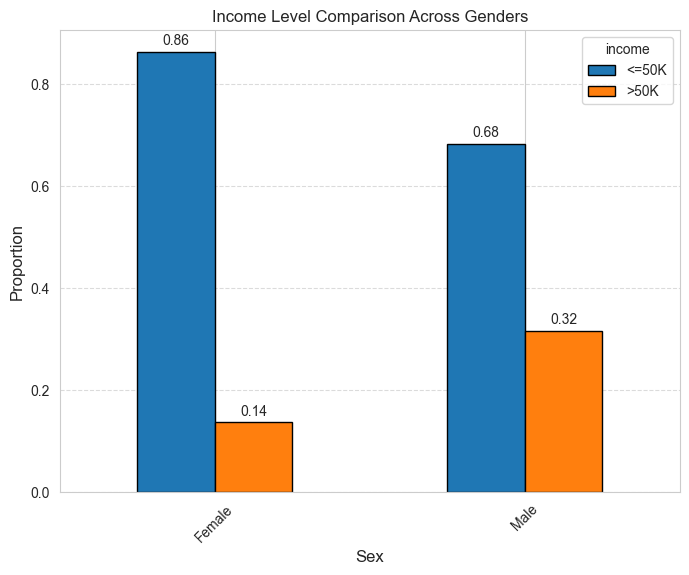

In [27]:
# I'm going to compare the distribution of data of the sex variable
# with the distribution of data based on the income (<=50K or >50K)
# In one fonction "make_sex_income", I'm going to first create a crosstable using the pandas fonction crosstable that represents
# the contingency table of the variables sex and income
# then, the fonction will make a bar plot that will present the distributions of data across the 2 categories of each variable

def make_sex_income():
    #creation of the table
    table = pd.crosstab(index=ad_dt['sex'],
                          columns=ad_dt['income'],
                          margins=True)
    table.index = ["Female","Male","total"]
    # Get the proportion of each pair of categories across the rows
    table = table.div(table["All"],
                      axis=0)
    #I remove the 'tota' as it is not needed for visualization
    table = table.drop(index="total")

    # Now I'm creating the stacked barplot
    plot = table.iloc[:,:-1].plot(kind="bar",
               figsize=(8,6),
               stacked=False,
               color=["#1f77b4", "#ff7f0e"],
                edgecolor="black",
              title="Income Level Comparison Across Genders")
    #Add proportion labels on top of each bar
    for container in plot.containers:
        plot.bar_label(container, fmt="%.2f", fontsize=10, padding=3)

    plt.xticks(rotation=45)
    plt.xlabel("Sex", fontsize=12)
    plt.ylabel("Proportion", fontsize=12)

    #Show gridlines for better readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

make_sex_income()


#### 7. r5 - comparing categories with more than 2 values for which I set the order
The private sector provides the majority of job opportunities in diverse fields, possibly due to its broad industry coverage and workforce demand compared to government or self-employment sectors.

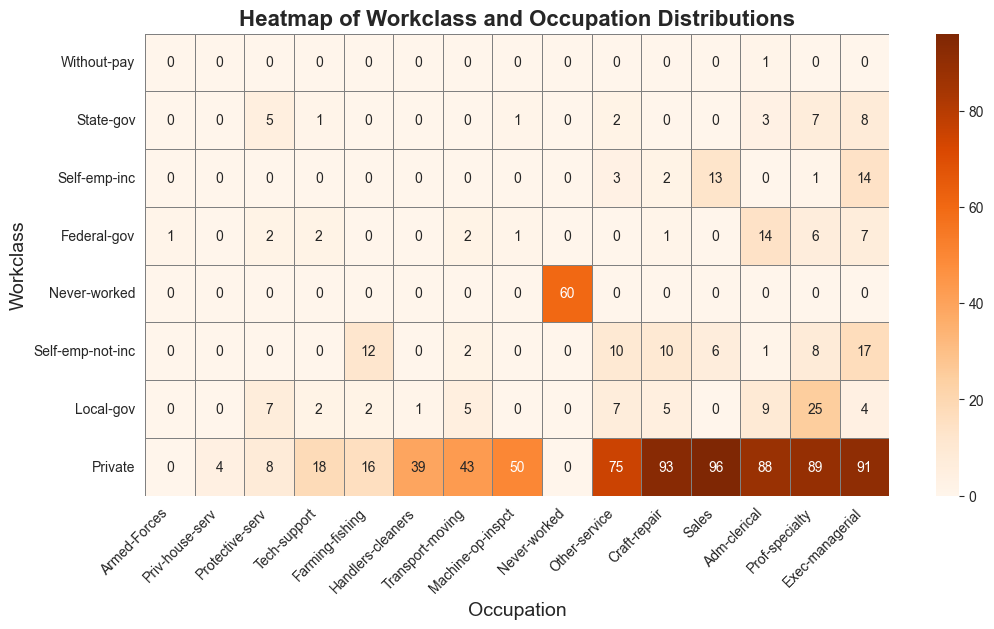

In [28]:
# I am gonna use seaborn to create a heatmap which an efficient chart to use when dealing with
# variables that have many categories by using color intensity to show relationships
# I'm gonna use the occupation categorical variable and and the workclass categorical variable
#Chat-Gpt was used to find how to reorder the values of each category

def make_heatmap_workcl_occup():
    # Replace '?' with 'Never-worked' in workclass and occupation columns
    ad_dt["workclass"] = ad_dt["workclass"].replace("?", "Never-worked")
    ad_dt["occupation"] = ad_dt["occupation"].replace("?", "Never-worked")
    
    # start by creating a contingency table (counts)
    work_occ_table = pd.crosstab(index=ad_dt['workclass'],
                                 columns=ad_dt['occupation'])

    # **Sort workclass and occupation by total count**
    sorted_workclass = work_occ_table.sum(axis=1).sort_values().index  # Sort rows
    sorted_occupation = work_occ_table.sum(axis=0).sort_values().index  # Sort columns

    # Reorder the table based on sorted values
    work_occ_table = work_occ_table.loc[sorted_workclass, sorted_occupation]


    #now the heatmap
    plt.figure(figsize=(12,6))
    sns.heatmap(work_occ_table,
    annot=True,            # show values inside heatmap
    fmt="d",               # Integer format for counts
    cmap="Oranges",           # The color palette
    linewidths=0.5,        # Add grid lines
    linecolor="gray",
    cbar=True)             # show color bar

    #Adding the title and labels
    plt.title("Heatmap of Workclass and Occupation Distributions", fontsize=16, fontweight="bold")
    plt.xlabel("Occupation", fontsize=14)
    plt.ylabel("Workclass", fontsize=14)
    plt.xticks(rotation=45, ha="right")

    plt.show()

make_heatmap_workcl_occup()


#### 8. r6 - use a scatterplot to highlight correlation between two numerical variables
Despite expecting a potential negative correlation between age and hours worked per week—where older individuals might work fewer hours—the scatter plot reveals no clear pattern, suggesting that age does not significantly influence the number of hours worked per week in this dataset.

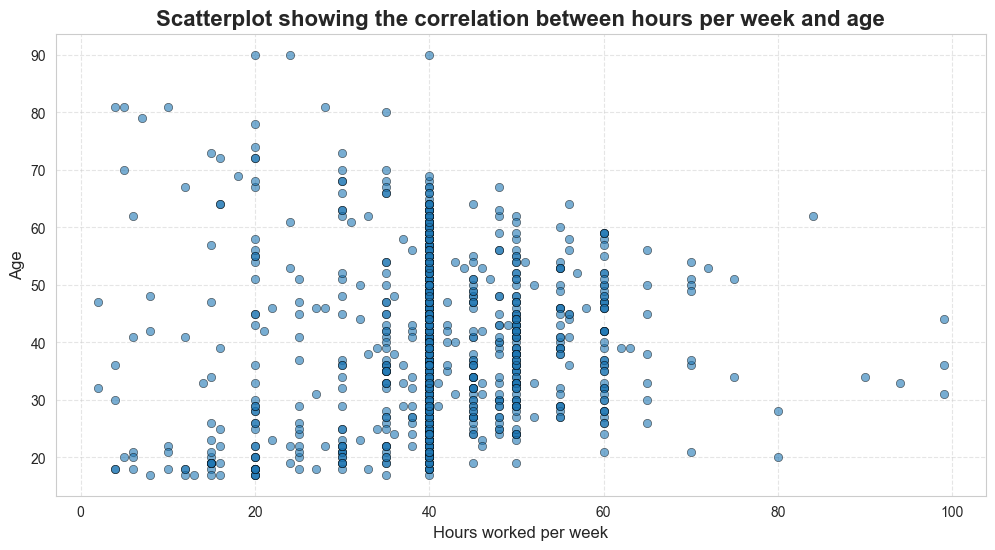

In [29]:
# I am gonna use the seaborn scatterplot 
# The two numerical variables hours_per_week and age are going to be studied to see if there's a correlation between them

def make_scatterplot_hours_gain():
    plt.figure(figsize=(12, 6))
    
    # Scatter plot with Seaborn
    sns.scatterplot(data=ad_dt, 
                    x="hours_per_week", 
                    y="age", 
                    color="#1f77b4",  # Blue 
                    alpha=0.6,  # Transparency to reduce overplotting
                    edgecolor="black") 
    
    plt.title("Scatterplot showing the correlation between hours per week and age",
              fontsize=16,
              fontweight="bold")
    plt.xlabel("Hours worked per week", fontsize=12)
    plt.ylabel("Age", fontsize=12)

    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

make_scatterplot_hours_gain()


#### 9. r7 - Split the data by certain categories to explore the numerical distributions
Adults in the dataset tend to work a comparable number of hours regardless of relationship status and that is shown by the similar patterns in the distributions of hours worked per week dor most relationship categories.

C:\Users\HP\AppData\Local\Temp\ipykernel_3772\3446456451.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ad_dt,


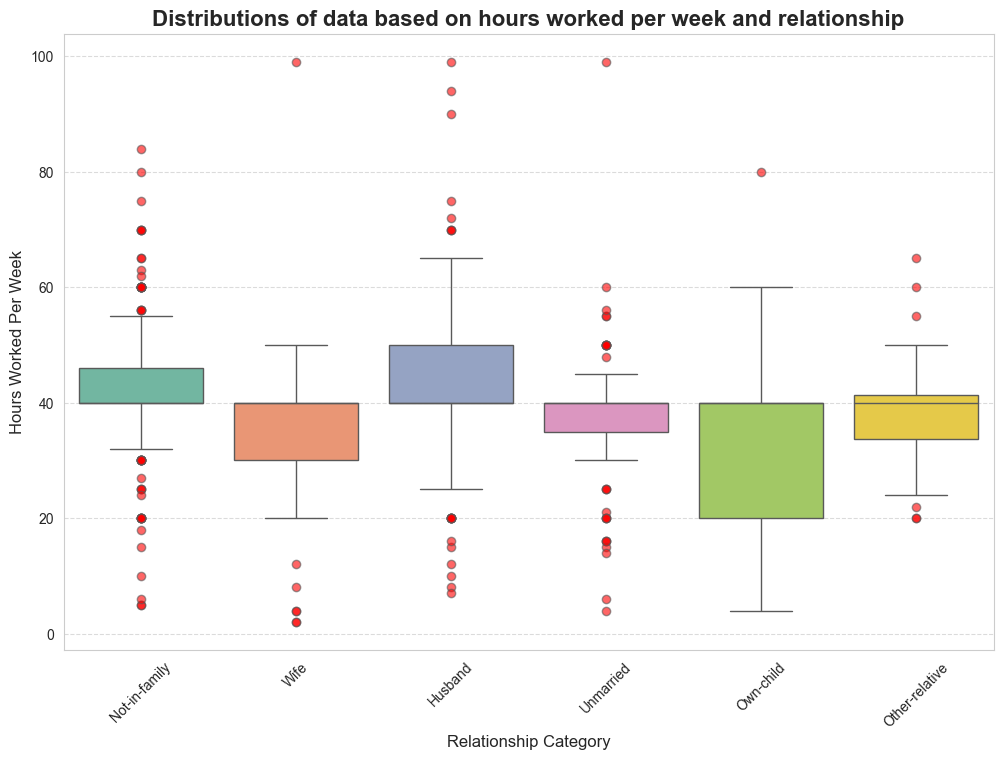

In [30]:
# I'm gonna use the seaborn's function to make a split boxplot that will show the numerical distributions of hours_per_week 
# by the categories of relationship

def make_boxplot_rel_hours():
    plt.figure(figsize=(12, 8))
    
   
    sns.boxplot(data=ad_dt, 
                x="relationship", 
                y="hours_per_week", 
                palette="Set2",  
                showfliers=True,  # Showing outliers
                flierprops={"marker": "o", "markerfacecolor": "red", "alpha": 0.6})  # Custom outliers
    
    plt.title("Distributions of data based on hours worked per week and relationship", fontsize=16, fontweight="bold")
    plt.xlabel("Relationship Category", fontsize=12)
    plt.ylabel("Hours Worked Per Week", fontsize=12)

    
    plt.xticks(rotation=45)

    
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


make_boxplot_rel_hours()

#### 10. r1 - Distribution of data points based on a numerical variable
The great majority of the dataset comes from the same region and share a lot of similar demographic characterisics.

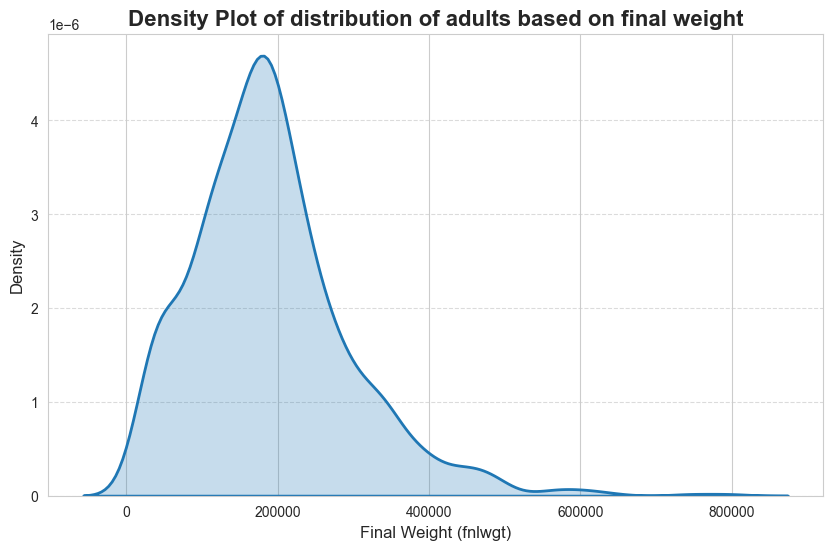

In [31]:
# The function make_densityplot will create a density plot that will show the distribution of dat points 
# based on the final weight (fnlwgt) variable
# I used ChatGpt to practice first how to make a density plot using seaborn
def make_densityplot():
    plt.figure(figsize=(10,6))

    sns.kdeplot(ad_dt["fnlwgt"],
                fill=True,
                color="#1f77b4",
                linewidth=2)

    plt.title("Density Plot of distribution of adults based on final weight",
                fontsize=16,
                fontweight="bold")

    plt.xlabel("Final Weight (fnlwgt)",
                fontsize=12)
    plt.ylabel("Density", fontsize=12)

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


make_densityplot()

### D. Conclusion
This case study applied various descriptive analysis methods, such as histograms, pie charts, bar plots, heatmaps, scatter plots, and box plots, to gain insights from the Adult Census Income dataset. Key findings, such as the concentration of individuals working 40 to 50 hours per week, the income disparity between genders, and the relationship between education and income, offer actionable insights for businesses and policymakers. For instance, the high work hours suggest the need for policies promoting work-life balance, while the gender income gap highlights the importance of gender equality initiatives. Additionally, the heatmap analysis of workclass and occupation patterns provides valuable information for employment strategies.

Overall, these insights can guide targeted interventions, inform labor policies, and improve business decision-making, demonstrating the power of data-driven analysis in understanding demographic trends.